Мини-анализ данных о выпущенных видеоиграх за период с 1980 по 2020 год!Построим график распределения количества выпущенных игр по годам, узнаем в каком году было выпущено больше всего игр, на каких платформах произошло больше всего релизов, игры каких издателей встречаются чаще всего, посчитаем среднее, медиану и стандартное отклонение по продажам игр издателя Nintendo, dизуализируем динамику изменения объема мировых продаж по годам.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/383837/games.csv')
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
data[data.Year.isna() == True]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [6]:
data[data.isna().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [7]:
# Удалим записи с пропущенными значениями:

data = data.dropna()
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
# Описательные характеристики переменной Year:

data.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [9]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

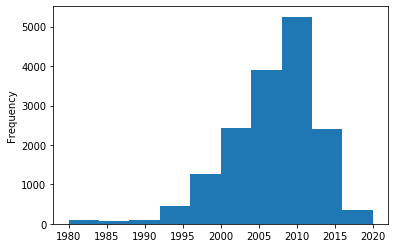

In [10]:
# График распределения количества выпущенных игр по годам

data.Year.plot(kind='hist')

In [11]:
# В каком году было выпущено больше всего игр:

data.Year.mode()

0    2009.0
dtype: float64

In [15]:
# На каких платформах произошло больше всего релизов? Оставим названия только тех платформ, частота 
# встречаемости которых составляет более 7%

a = (data.Platform.value_counts() / data.Platform.count() * 100).to_frame()
a[a.Platform > 7].index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [16]:
# Игры каких издателей встречаются чаще всего

data.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Fortyfive                          1
Illusion Softworks                 1
ASK                                1
GOA                                1
Navarre Corp                       1
Name: Publisher, Length: 576, dtype: int64

In [20]:
data.Publisher.value_counts().index[0]

'Electronic Arts'

In [21]:
# Посчитаем среднее, медиану и стандартное отклонение по продажам игр издателя Nintendo в разных регионах 
# (NA, EU, JP, Other). 

data1 = data[data.Publisher =='Nintendo']
data1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean()

NA_Sales       1.172055
EU_Sales       0.601006
JP_Sales       0.653721
Other_Sales    0.136767
dtype: float64

In [49]:
data1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].median()

NA_Sales       0.375
EU_Sales       0.120
JP_Sales       0.280
Other_Sales    0.030
dtype: float64

In [50]:
data1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].std()

NA_Sales       2.989913
EU_Sales       1.743953
JP_Sales       1.063110
Other_Sales    0.464170
dtype: float64

In [60]:
# Посмотрим на продажи Nintendo в Японии по жанрам и построим боксплот

data2 = data1[['Genre','JP_Sales']].groupby('Genre').sum().reset_index()
data2

,Genre,JP_Sales
0,Action,29.16
1,Adventure,9.01
2,Fighting,14.94
3,Misc,55.25
4,Platform,102.36
5,Puzzle,37.09
6,Racing,29.22
7,Role-Playing,101.95
8,Shooter,6.03
9,Simulation,23.65


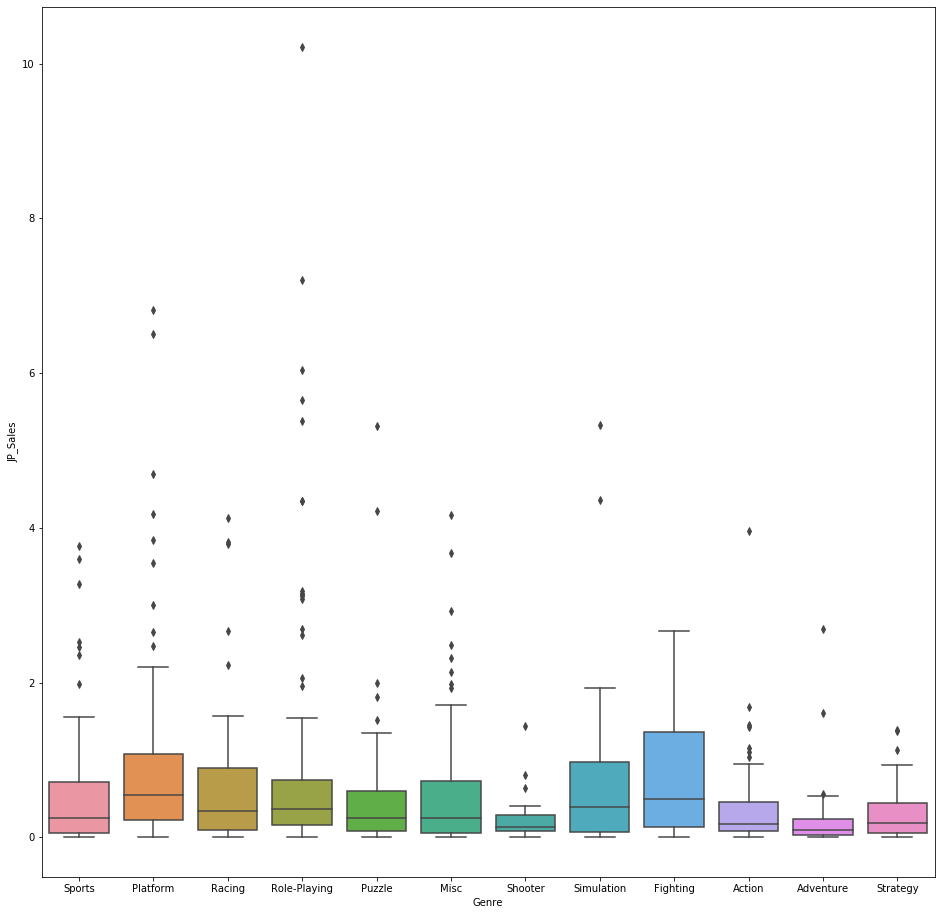

In [66]:
plt.figure(figsize=(16,16))
ax = sns.boxplot(data = data1, y='JP_Sales',x='Genre')

In [69]:
data2 = data1[data1['Genre'].isin(['Fighting','Simulation','Platform','Racing','Sports'])]
data2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
...,...,...,...,...,...,...,...,...,...,...,...
12123,12125,Mario Tennis,Wii,2010.0,Sports,Nintendo,0.00,0.06,0.00,0.01,0.07
12770,12772,Dance Dance Revolution: Mario Mix (JP sales),GC,2005.0,Simulation,Nintendo,0.00,0.00,0.05,0.00,0.06
14626,14629,Calcio Bit,GBA,2006.0,Sports,Nintendo,0.00,0.00,0.03,0.00,0.03
14968,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


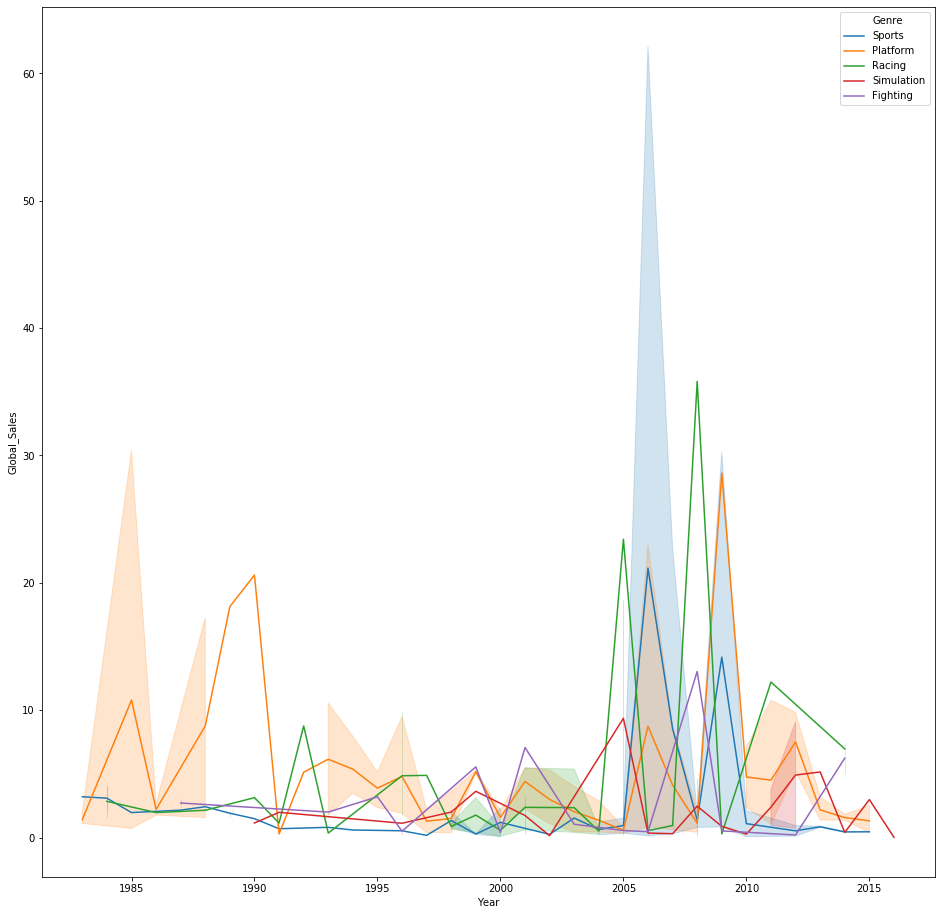

In [73]:
# Визуализируем динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров:
# Fighting, Simulation, Platform, Racing, Sports

plt.figure(figsize=(16,16))
ax = sns.lineplot(data = data2,x='Year',y='Global_Sales',hue=data2.Genre)